# Telegram Messages EDA

This notebook performs an exploratory data analysis (EDA) on a dataset of Telegram channels’ messages stored in an SQLite database. The table now has the following updated columns:

- **group_name** (TEXT, Not Null)
- **message_id** (INTEGER, Not Null)
- **utc_date** (TEXT, Nullable)
- **local_date** (TEXT, Nullable)
- **text** (TEXT, Nullable)
- **sender_id** (INTEGER, Nullable)
- **reply_to_msg_id** (INTEGER, Nullable)
- **forwarded_from** (TEXT, Nullable)
- **forward_count** (INTEGER, Nullable)
- **media_type** (TEXT, Nullable)
- **media_attributes** (TEXT, Nullable)
- **entities** (TEXT, Nullable)
- **views** (INTEGER, Nullable)
- **reactions** (TEXT, Nullable)
- **hour** (INTEGER, Nullable)
- **day_of_week** (INTEGER, Nullable)
- **month** (INTEGER, Nullable)
- **week_of_year** (INTEGER, Nullable)
- **word_count** (INTEGER, Nullable)
- **emoji_count** (INTEGER, Nullable)

The following sections include data loading, quality checks, univariate and bivariate analyses, temporal trends, and advanced categorical analyses.

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Configure visualizations
sns.set_theme(style="whitegrid")
%matplotlib inline


## Load Data from SQLite Database

We connect to the SQLite database, load the table into a Pandas DataFrame, and preview the data.

In [2]:
db_path = '../data/telegram/telegram_data.db'
table_name = 'groups_messages'

# Establish connection to the SQLite database
conn = sqlite3.connect(db_path)

# Load data from the specified table into a DataFrame
query = f"SELECT * FROM {table_name}"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the first few rows
df.head()


,group_name,message_id,utc_date,local_date,text,sender_id,reply_to_msg_id,forwarded_from,forward_count,media_type,media_attributes,entities,views,reactions,hour,day_of_week,month,week_of_year,word_count,emoji_count
0,idf_telegram,15461,2025-02-21 19:35:05+0000,2025-02-21 21:35:05+0200,"דובר צה""ל: \n\nבהמשך לדיווחים על אודות שירי בי...",-1001155294424,NaN,None,27.0,None,None,None,18359.0,"[{""emoji"": ""\ud83d\ude4f"", ""count"": 127}, {""em...",21,4,2,7,35,0
1,idf_telegram,15460,2025-02-21 13:50:56+0000,2025-02-21 15:50:56+0200,צפו בעדכון דובר צה״ל בשידור חי >>>\nhttps://ww...,-1001155294424,NaN,None,23.0,MessageMediaPhoto,"{""photo_id"": 5891017314478967608, ""width"": nul...","[{""type"": ""MessageEntityBold"", ""offset"": 0, ""l...",21698.0,"[{""emoji"": ""\ud83d\udc94"", ""count"": 116}, {""em...",15,4,2,7,8,0
2,idf_telegram,15459,2025-02-21 10:30:15+0000,2025-02-21 12:30:15+0200,המבצע ביהודה ושומרון נמשך:\nכוחות דובדבן עצרו ...,-1001155294424,NaN,None,12.0,MessageMediaPhoto,"{""photo_id"": 5891017314478967494, ""width"": nul...","[{""type"": ""MessageEntityBold"", ""offset"": 27, ""...",20903.0,"[{""emoji"": ""\u2764"", ""count"": 81}, {""emoji"": ""...",12,4,2,7,14,0
3,idf_telegram,15458,2025-02-21 00:20:08+0000,2025-02-21 02:20:08+0200,"דובר צה""ל:\n\nבהתאם להערכת המצב הוחלט על תגבור...",-1001155294424,NaN,None,21.0,None,None,None,20165.0,"[{""emoji"": ""\ud83d\udc4d"", ""count"": 122}, {""em...",2,4,2,7,42,0
4,idf_telegram,15457,2025-02-20 23:07:30+0000,2025-02-21 01:07:30+0200,דובר צה״ל:\n\nלאחר השלמת הליך הזיהוי על ידי המ...,-1001155294424,NaN,None,112.0,None,None,None,32244.0,"[{""emoji"": ""\ud83d\udc94"", ""count"": 565}, {""em...",1,4,2,7,174,0


## Data Quality & Summary Statistics

In this section, we:
- Check the shape of the DataFrame.
- Identify missing values per column.
- Check for duplicate messages (using `message_id`).
- Generate basic descriptive statistics for numeric columns.

In [3]:
# DataFrame shape
print("DataFrame shape:", df.shape)

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

# Check for duplicate rows based on message_id
duplicate_messages = df.duplicated(subset=['group_name', 'message_id']).sum()
print("\nNumber of duplicate messages (based on group_name and message_id):", duplicate_messages)

DataFrame shape: (611484, 20)

Missing values per column:
group_name               0
message_id               0
utc_date                 0
local_date               0
text                     0
sender_id                0
reply_to_msg_id     578606
forwarded_from      440372
forward_count         1183
media_type          330140
media_attributes    330140
entities            171256
views                 1183
reactions            79632
hour                     0
day_of_week              0
month                    0
week_of_year             0
word_count               0
emoji_count              0
dtype: int64

Number of duplicate messages (based on group_name and message_id): 0


In [4]:
# Descriptive statistics for numeric columns
# Here we focus on key numeric features
numeric_cols = ['emoji_count', 'word_count', 'views', 'forward_count', 'hour', 'day_of_week', 'month', 'week_of_year']
df[numeric_cols].describe()

,emoji_count,word_count,views,forward_count,hour,day_of_week,month,week_of_year
count,611484.000000,611484.000000,6.103010e+05,610301.000000,611484.000000,611484.000000,611484.000000,611484.000000
mean,0.362116,26.207830,3.320406e+04,11.142731,13.431063,2.961422,7.205283,28.986773
std,1.466769,42.558728,5.627019e+04,61.705270,6.200611,2.006284,3.753276,16.533627
min,0.000000,0.000000,9.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,11.000000,5.993000e+03,0.000000,9.000000,1.000000,4.000000,14.000000
50%,0.000000,16.000000,1.209600e+04,1.000000,14.000000,3.000000,8.000000,33.000000
75%,0.000000,25.000000,3.239700e+04,5.000000,18.000000,5.000000,10.000000,44.000000
max,262.000000,835.000000,3.379550e+06,14312.000000,23.000000,6.000000,12.000000,53.000000


## Uni-variate Analysis

### 1. Messages per Group

Visualize the number of messages in each group.`

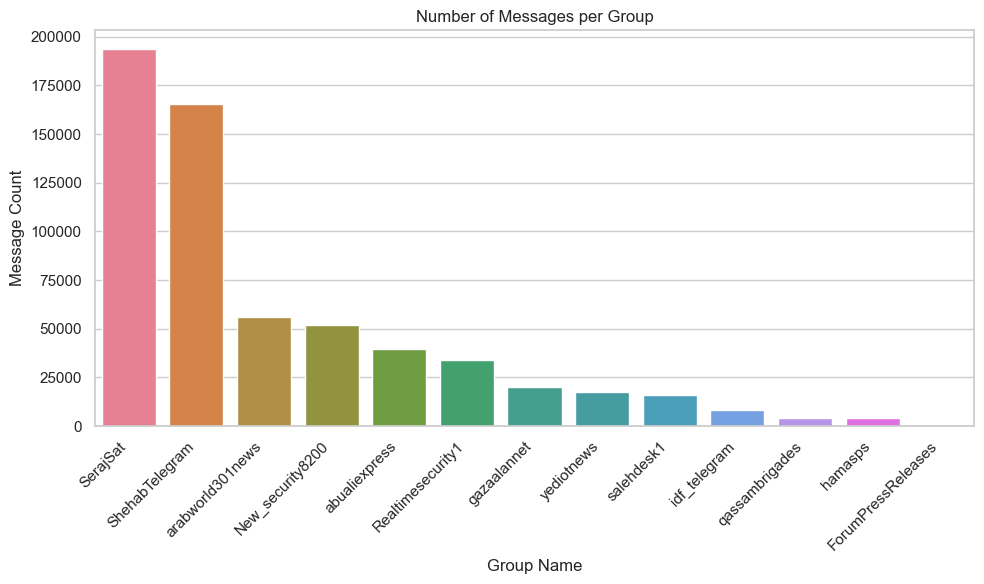

In [5]:
# Count messages per group
messages_per_group = df['group_name'].value_counts()

plt.figure(figsize=(10, 6))
# sns.barplot(x=messages_per_group.index, y=messages_per_group.values, palette='viridis')
sns.barplot(x=messages_per_group.index, y=messages_per_group.values, hue=messages_per_group.index, legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Messages per Group')
plt.xlabel('Group Name')
plt.ylabel('Message Count')
plt.tight_layout()
plt.show()


### 2. Null or Empty Text Messages per Group

Examine the count of null or empty text messages (if any) for each group.

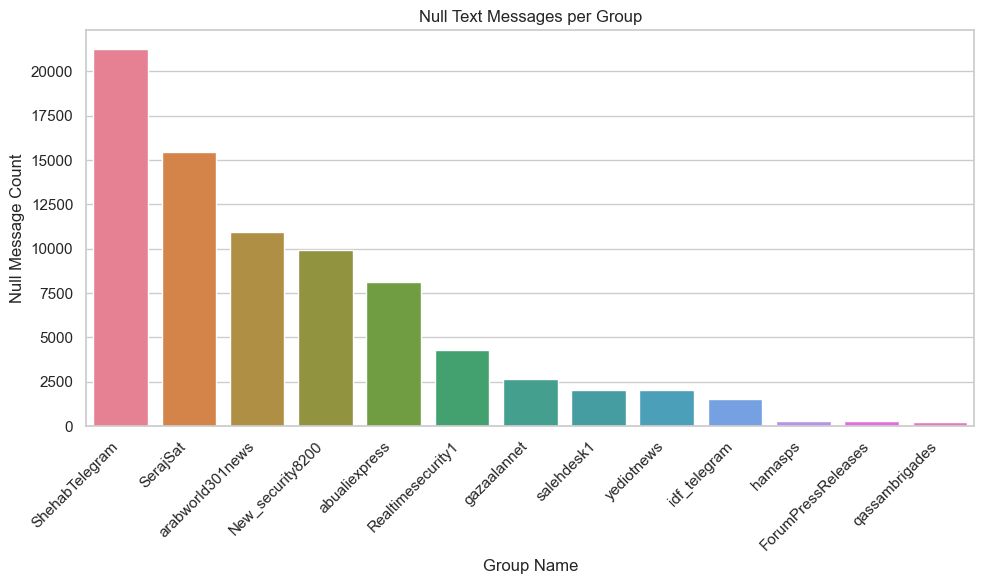

In [6]:
# Count null text messages per group
# null_messages = df[df['text'].isnull() | df['text']== ''].groupby('group_name').size()
null_messages = df[df['text'].isna() | (df['text'].str.len() == 0)].groupby('group_name').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
# sns.barplot(x=null_messages.index, y=null_messages.values, palette='magma')
sns.barplot(x=null_messages.index, y=null_messages.values, hue=null_messages.index, legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Null Text Messages per Group')
plt.xlabel('Group Name')
plt.ylabel('Null Message Count')
plt.tight_layout()
plt.show()


In [7]:
null_messages

group_name
ShehabTelegram        21252
SerajSat              15471
arabworld301news      10952
New_security8200       9953
abualiexpress          8109
Realtimesecurity1      4305
gazaalannet            2634
salehdesk1             2066
yediotnews             2031
idf_telegram           1505
hamasps                 295
ForumPressReleases      262
qassambrigades          207
dtype: int64

We check if the null text messages correspond to zero word counts:

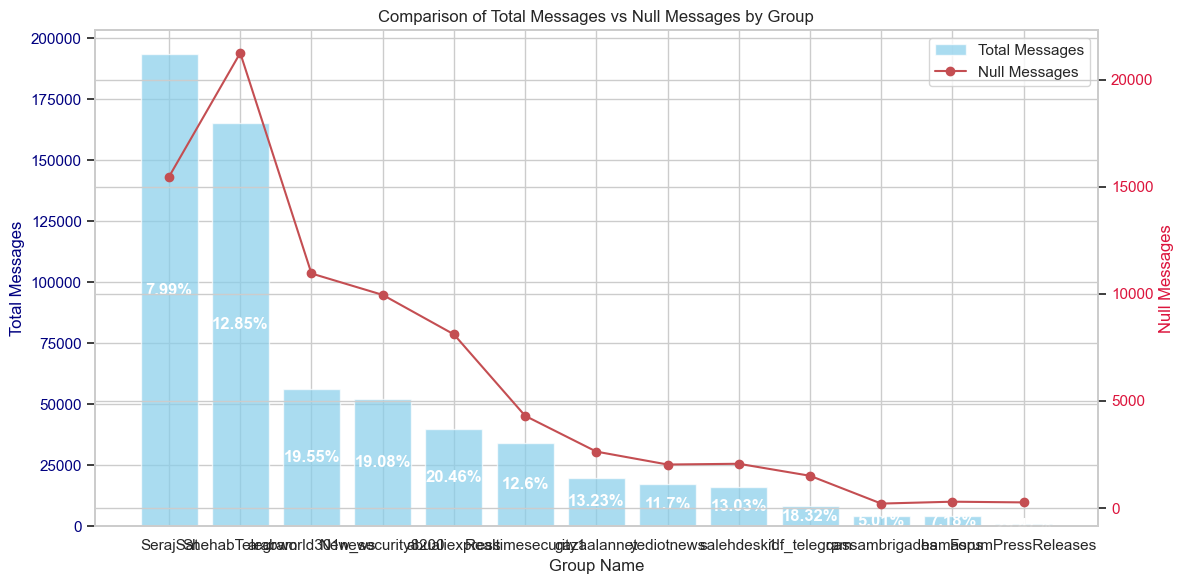

Correlation between total messages and null messages: 0.919


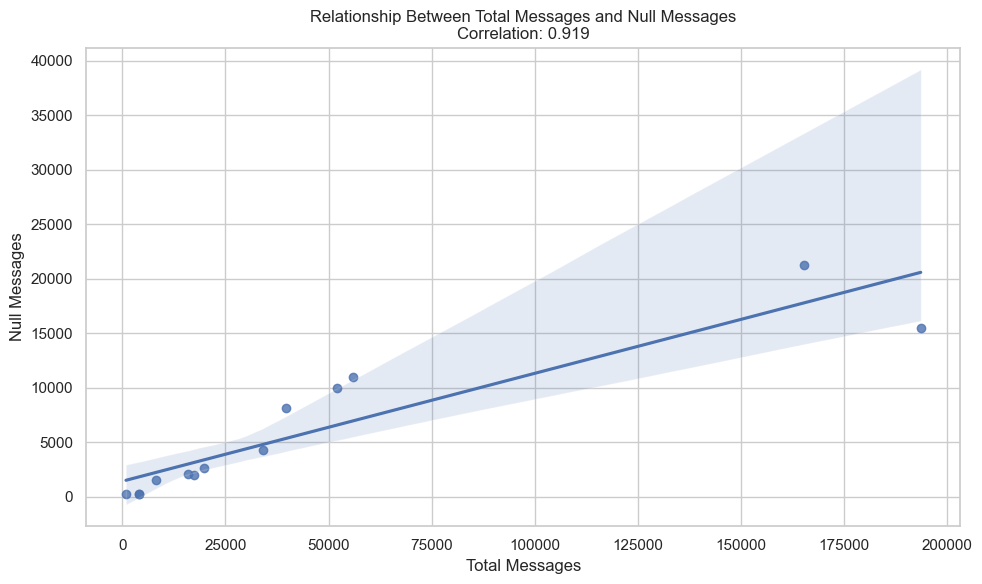

                    Total Messages  Null Messages  Null %  Total Rank  \
group_name                                                              
SerajSat                    193625          15471    7.99         1.0   
ShehabTelegram              165400          21252   12.85         2.0   
arabworld301news             56030          10952   19.55         3.0   
New_security8200             52172           9953   19.08         4.0   
abualiexpress                39625           8109   20.46         5.0   
Realtimesecurity1            34158           4305   12.60         6.0   
gazaalannet                  19907           2634   13.23         7.0   
yediotnews                   17363           2031   11.70         8.0   
salehdesk1                   15858           2066   13.03         9.0   
idf_telegram                  8217           1505   18.32        10.0   
qassambrigades                4134            207    5.01        11.0   
hamasps                       4106            295  

In [8]:
# Create a DataFrame to compare message counts and null counts per group
comparison_df = pd.DataFrame({
    'Total Messages': df.groupby('group_name').size(),
    'Null Messages': df[df['text'].isna() | (df['text'].str.len() == 0)].groupby('group_name').size(),
})

# Calculate percentage of null messages
comparison_df['Null %'] = (comparison_df['Null Messages'] / comparison_df['Total Messages'] * 100).round(2)

# Add rankings to see if there's a pattern
comparison_df['Total Rank'] = comparison_df['Total Messages'].rank(ascending=False)
comparison_df['Null Rank'] = comparison_df['Null Messages'].rank(ascending=False)
comparison_df['Rank Difference'] = (comparison_df['Total Rank'] - comparison_df['Null Rank']).abs()

# Sort by total message count
sorted_df = comparison_df.sort_values('Total Messages', ascending=False)

# Create a dual-axis plot to compare rankings
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total messages
bars = ax1.bar(sorted_df.index, sorted_df['Total Messages'], color='skyblue', alpha=0.7, label='Total Messages')
ax1.set_xlabel('Group Name')
ax1.set_ylabel('Total Messages', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

# Create a second y-axis for null messages
ax2 = ax1.twinx()
line = ax2.plot(sorted_df.index, sorted_df['Null Messages'], 'r-o', label='Null Messages')
ax2.set_ylabel('Null Messages', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Add null percentage labels
for i, (idx, row) in enumerate(sorted_df.iterrows()):
    ax1.text(i, row['Total Messages']/2,
             f"{row['Null %']}%",
             ha='center', va='center', fontweight='bold', color='white')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Comparison of Total Messages vs Null Messages by Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show correlation between total messages and null messages
correlation = comparison_df[['Total Messages', 'Null Messages']].corr().iloc[0,1]
print(f"Correlation between total messages and null messages: {correlation:.3f}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Messages', y='Null Messages', data=comparison_df)
plt.title(f'Relationship Between Total Messages and Null Messages\nCorrelation: {correlation:.3f}')
plt.xlabel('Total Messages')
plt.ylabel('Null Messages')
plt.tight_layout()
plt.show()

# Print the full comparison table
print(sorted_df)

### 3. Distribution of Messages across Dates

Plot the number of messages over time using the `local_date` column. (Ensure the date strings are properly parsed.)

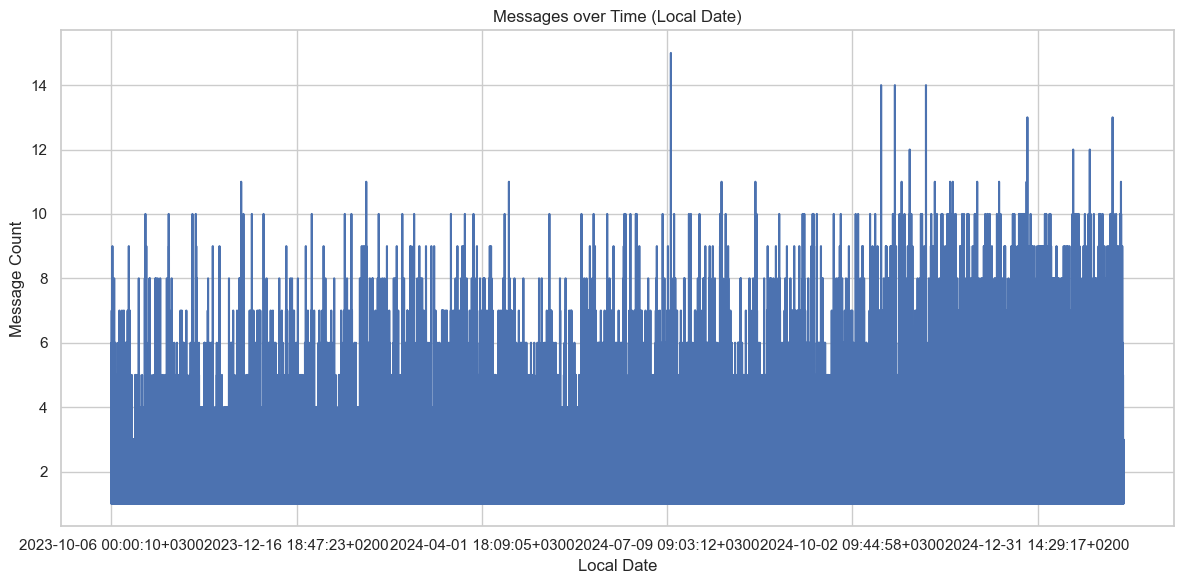

In [9]:
# Convert the 'local_date' column to datetime (if not already in datetime format)
# df['local_date'] = pd.to_datetime(df['local_date'], errors='coerce')

# Group messages by local_date and sort by date
messages_by_date = df['local_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
messages_by_date.plot(kind='line')
plt.title('Messages over Time (Local Date)')
plt.xlabel('Local Date')
plt.ylabel('Message Count')
plt.tight_layout()
plt.show()


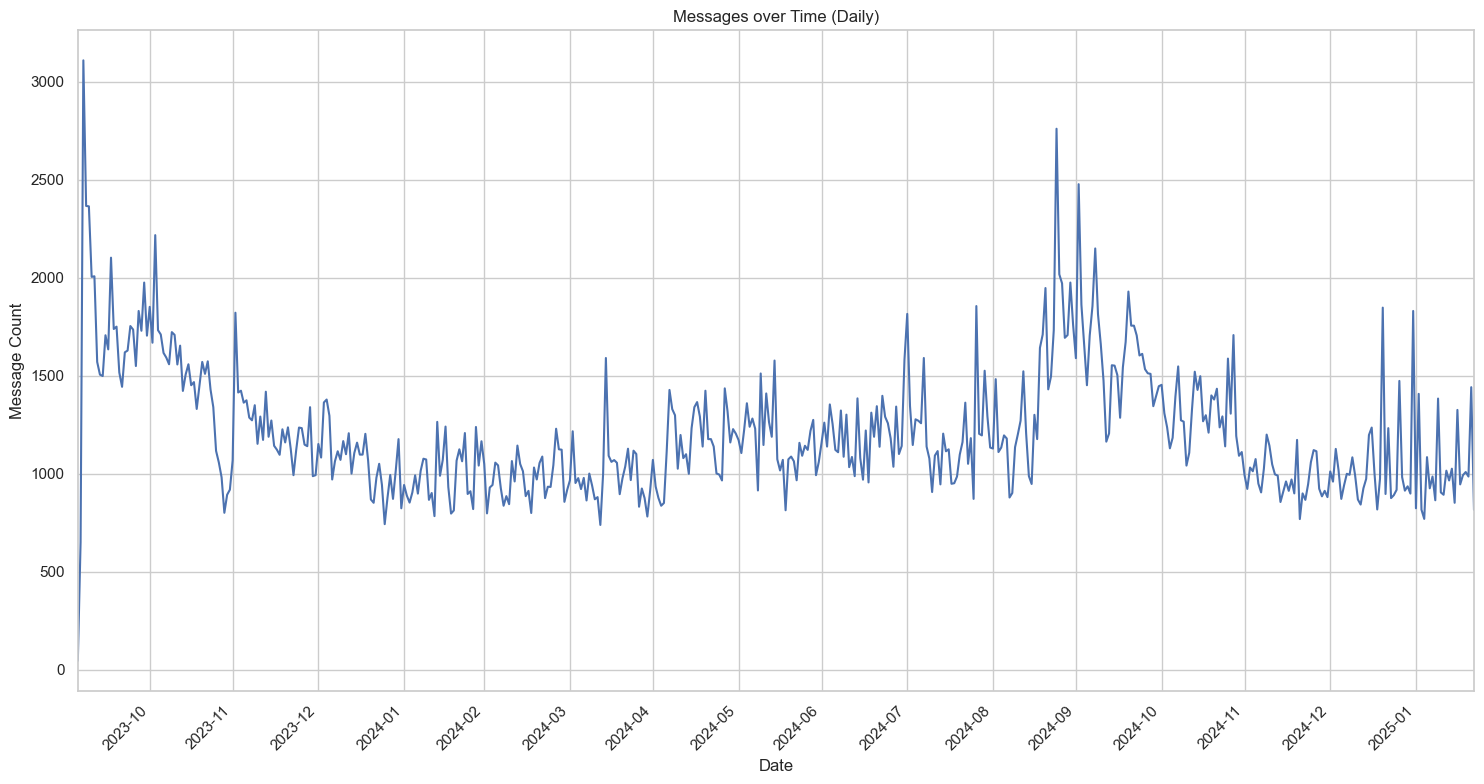

In [10]:
# Plot the message count over time resampled by date only, not time
plt.figure(figsize=(15, 8))

# Resample and plot the data
# Convert local_date to datetime and set as index
df['local_date'] = pd.to_datetime(df['local_date'], utc=True)
daily_counts = df.set_index('local_date').resample('D').size()
daily_counts.plot(style='-')

# Create date range for x-axis ticks at month ends
date_range = pd.date_range(start=df['local_date'].min(),
                          end=df['local_date'].max(),
                          freq='ME')

# Format x-axis
plt.xticks(date_range,
           date_range.strftime('%Y-%m'),
           rotation=45,
           ha='right')

plt.title('Messages over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
daily_counts.sort_values(ascending=False)

local_date
2023-10-07 00:00:00+00:00    3109
2024-09-23 00:00:00+00:00    2760
2024-10-01 00:00:00+00:00    2477
2023-10-08 00:00:00+00:00    2366
2023-10-09 00:00:00+00:00    2364
                             ... 
2024-12-20 00:00:00+00:00     768
2024-01-24 00:00:00+00:00     742
2024-04-11 00:00:00+00:00     738
2023-10-06 00:00:00+00:00     651
2023-10-05 00:00:00+00:00      45
Length: 506, dtype: int64

## Numeric Distributions

We now explore the distribution of key numeric features: `emoji_count`, `word_count`, `views`, and `forward_count`.

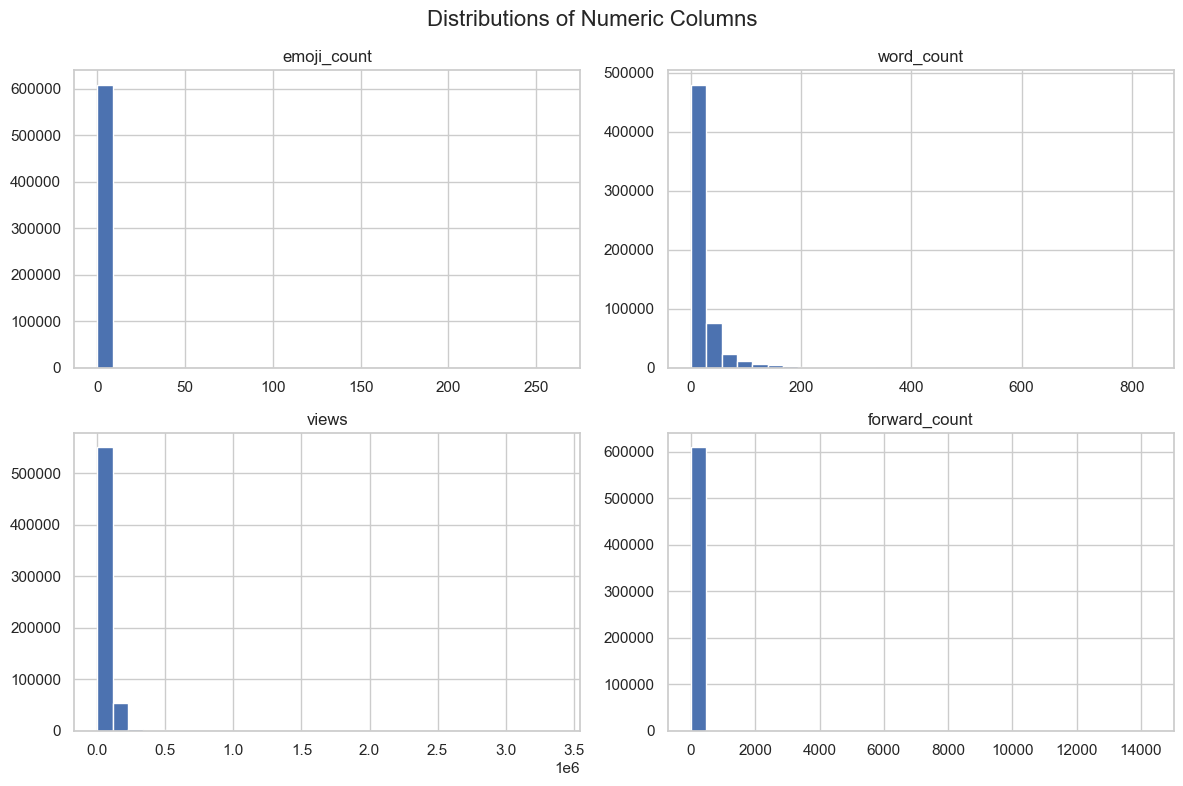

In [12]:
# %% [code]
# Define numeric columns for distribution plots
numeric_cols_analysis = ['emoji_count', 'word_count', 'views', 'forward_count']

# Plot histograms for numeric distributions
df[numeric_cols_analysis].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distributions of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

### Log-log Scale Plots

A log-log scale plot helps visualize highly skewed data by applying logarithmic transformation to both axes:
* **Y-axis (log):** Compresses large frequency differences, making small counts visible
* **X-axis (log):** Spreads out data points that are close to zero and compresses large values

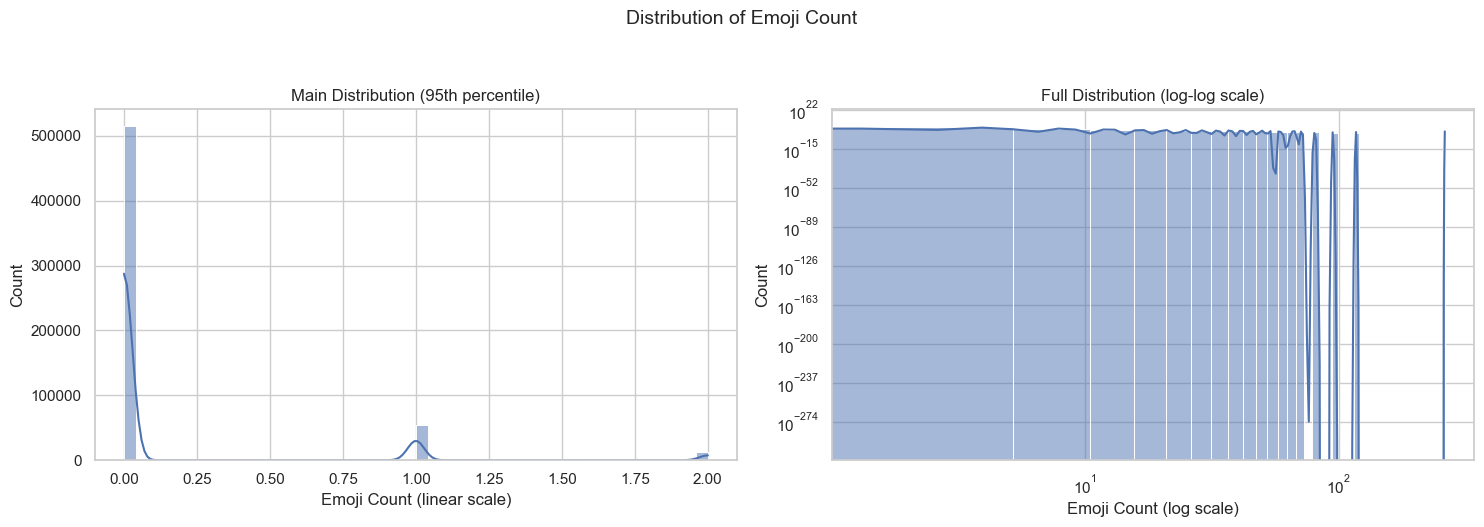


Summary statistics for emoji_count:
count    611484.000000
mean          0.362116
std           1.466769
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         262.000000
Name: emoji_count, dtype: float64


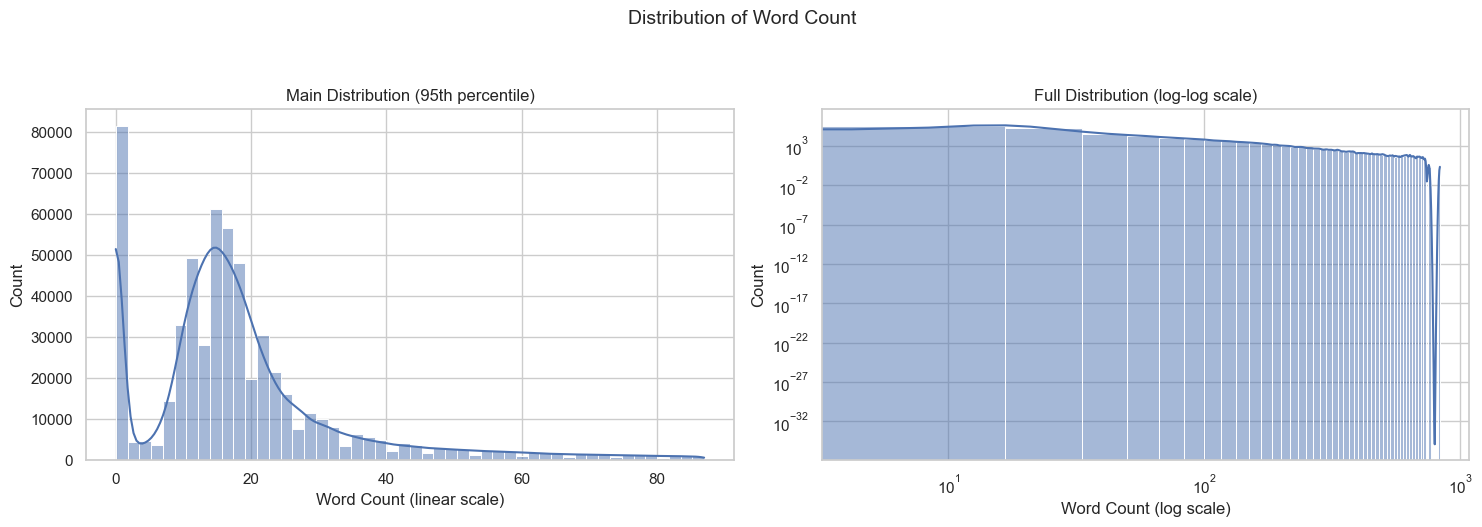


Summary statistics for word_count:
count    611484.000000
mean         26.207830
std          42.558728
min           0.000000
25%          11.000000
50%          16.000000
75%          25.000000
max         835.000000
Name: word_count, dtype: float64


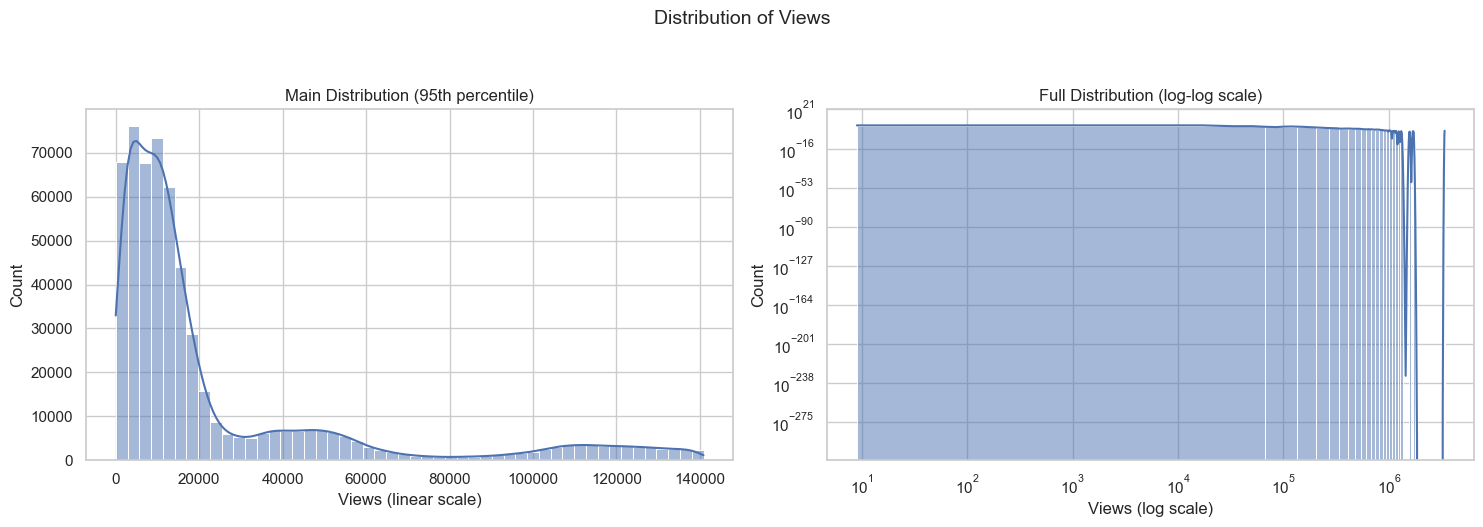


Summary statistics for views:
count    6.103010e+05
mean     3.320406e+04
std      5.627019e+04
min      9.000000e+00
25%      5.993000e+03
50%      1.209600e+04
75%      3.239700e+04
max      3.379550e+06
Name: views, dtype: float64


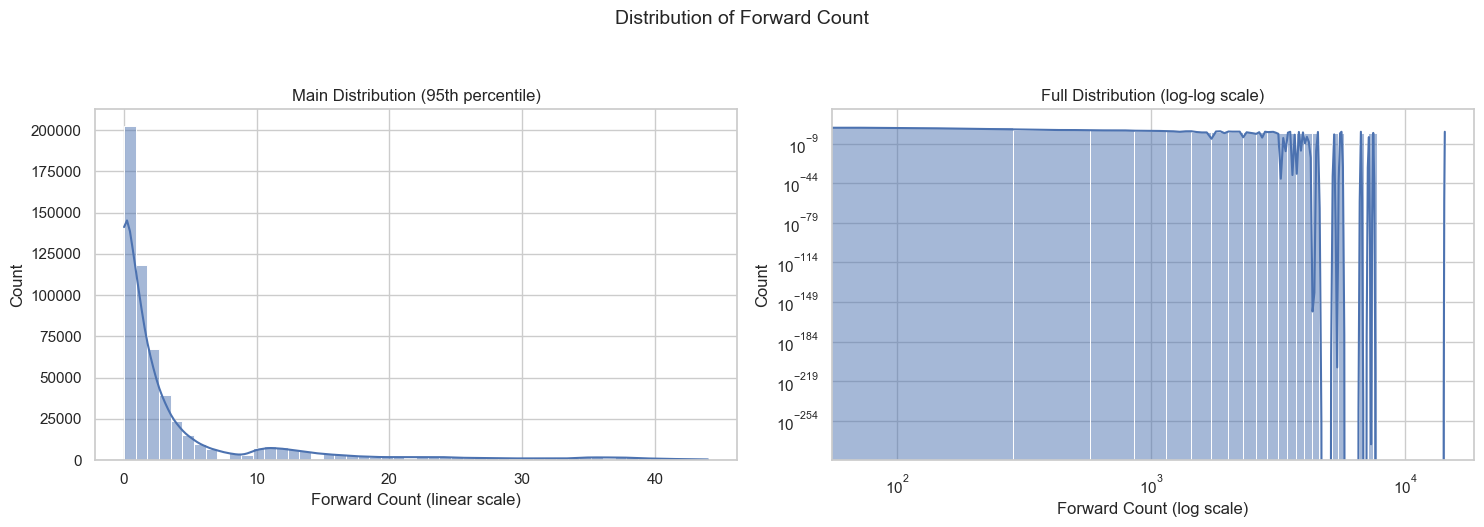


Summary statistics for forward_count:
count    610301.000000
mean         11.142731
std          61.705270
min           0.000000
25%           0.000000
50%           1.000000
75%           5.000000
max       14312.000000
Name: forward_count, dtype: float64


In [13]:
# Create individual plots with customized binning and scales
for col in numeric_cols_analysis:
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Distribution of {col.replace("_", " ").title()}', fontsize=14, y=1.05)

    # Left plot: Focus on main distribution
    # Use percentile-based clipping to handle extreme values
    upper_limit = df[col].quantile(0.95)  # Show up to 95th percentile
    filtered_data = df[df[col] <= upper_limit]

    sns.histplot(data=filtered_data, x=col, bins=50, kde=True, ax=ax1)
    ax1.set_title('Main Distribution (95th percentile)')
    ax1.set_xlabel(f'{col.replace("_", " ").title()} (linear scale)')

    # Right plot: Full distribution with log scales
    sns.histplot(data=df, x=col, bins=50, kde=True, ax=ax2)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_title('Full Distribution (log-log scale)')
    ax2.set_xlabel(f'{col.replace("_", " ").title()} (log scale)')

    plt.tight_layout()
    plt.show()

    # Display summary statistics
    print(f"\nSummary statistics for {col}:")
    print(df[col].describe())

### Boxplots to Detect Outliers

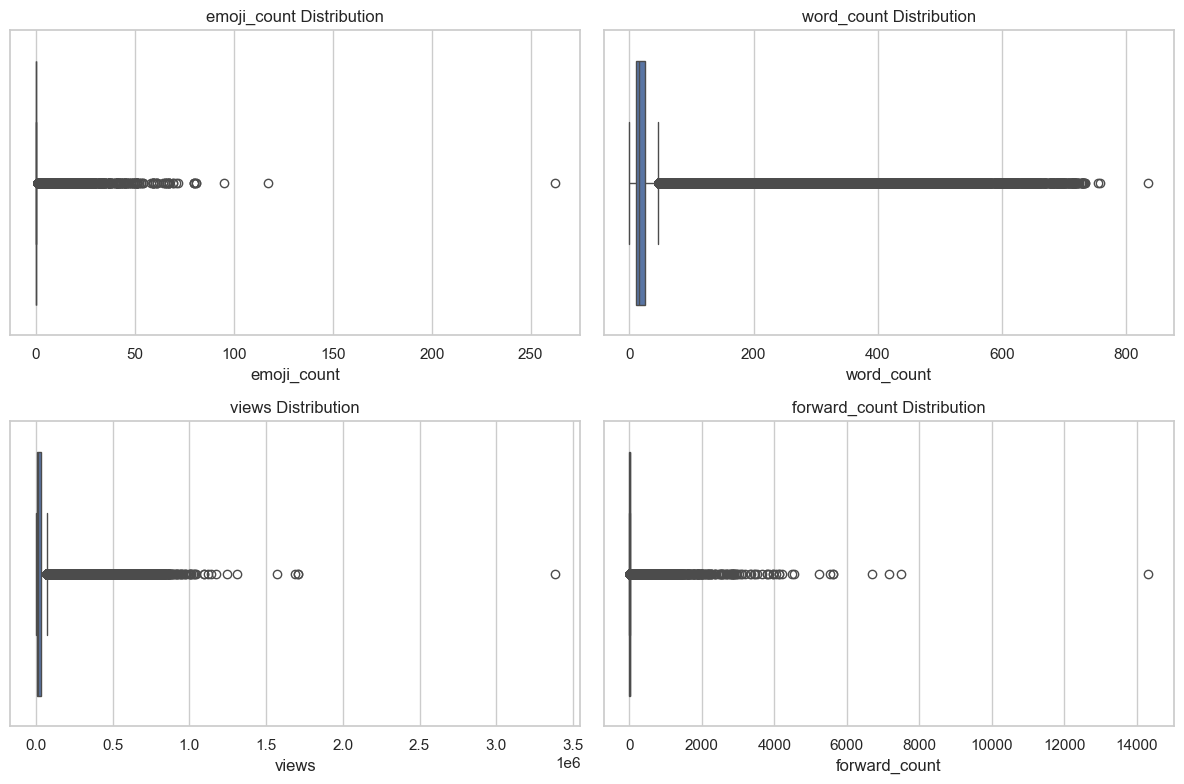

In [14]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols_analysis, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


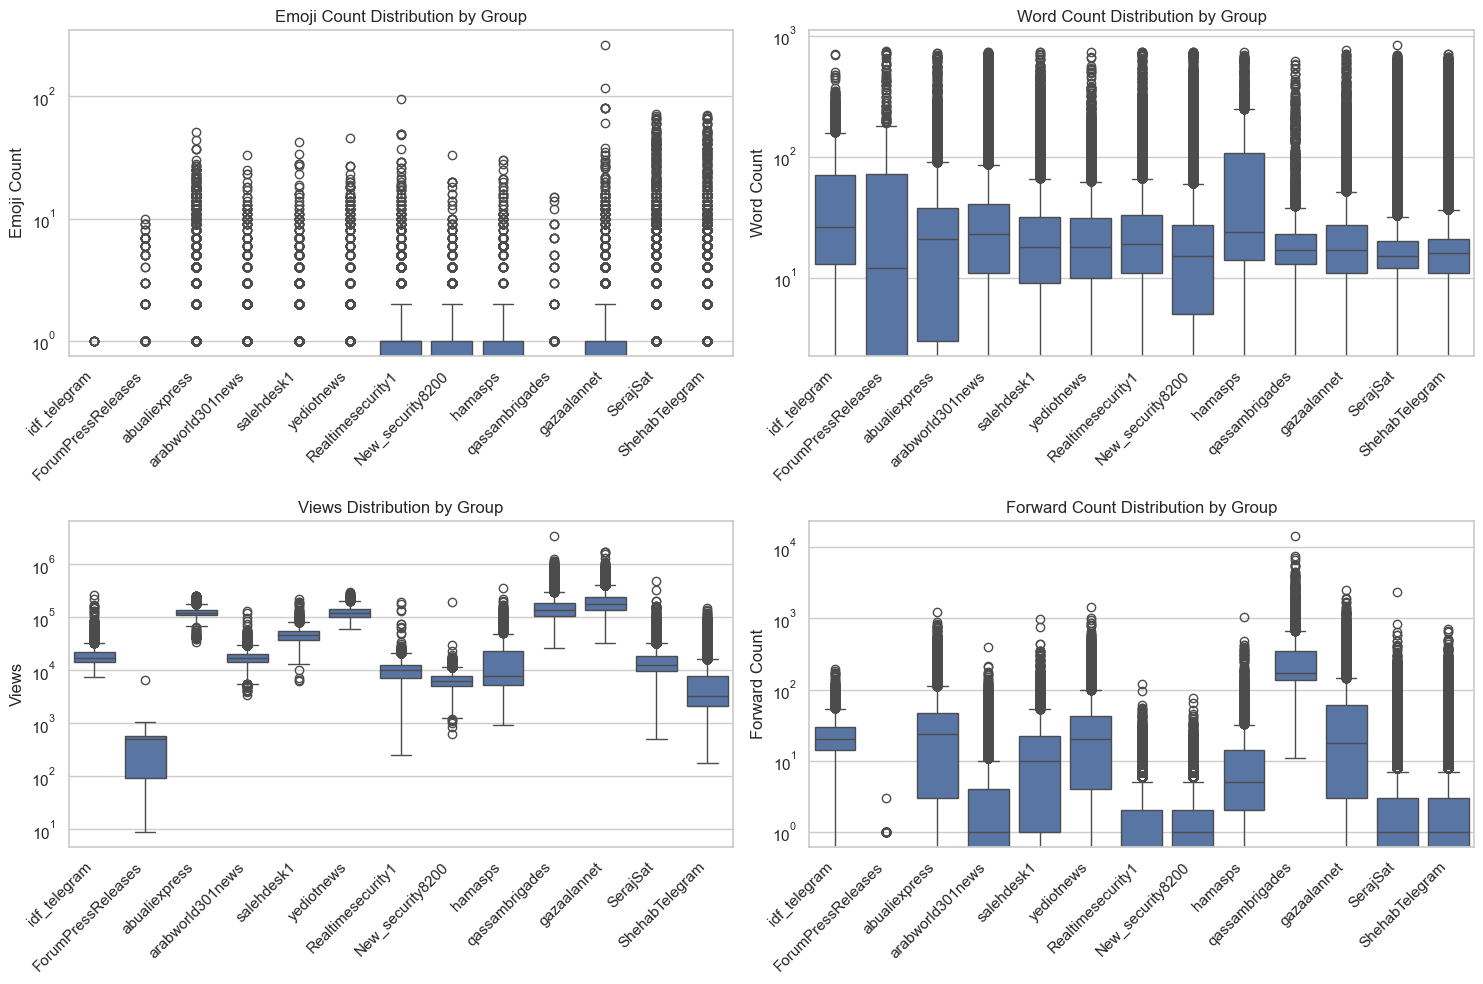

In [15]:
# Create boxplots with log scale per group
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols_analysis, 1):
    plt.subplot(2, 2, i)

    # Create boxplot with groups
    sns.boxplot(data=df, x='group_name', y=col)

    # Set log scale for y-axis to handle extreme outliers
    plt.yscale('log')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')

    # Customize titles and labels
    plt.title(f'{col.replace("_", " ").title()} Distribution by Group')
    plt.xlabel('')
    plt.ylabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()

## Temporal Analysis

We examine patterns in message frequency by time attributes such as hour, day of week, and month.

**Note:** The column `day_of_week` is stored as an integer (typically 0=Monday, …, 6=Sunday). You can create a mapping if desired.

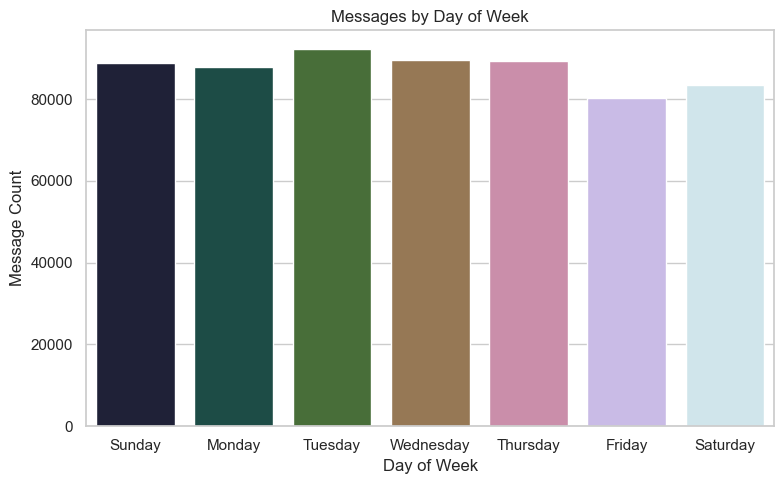

In [16]:
# convert day_of_week integer to day name using a mapping
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_map)

# Order days with Sunday first
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# Messages by day of week
day_counts = df['day_name'].value_counts().reindex(ordered_days)

plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='cubehelix', hue=day_counts.index, legend=False)
plt.title('Messages by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Message Count')
plt.tight_layout()
plt.show()


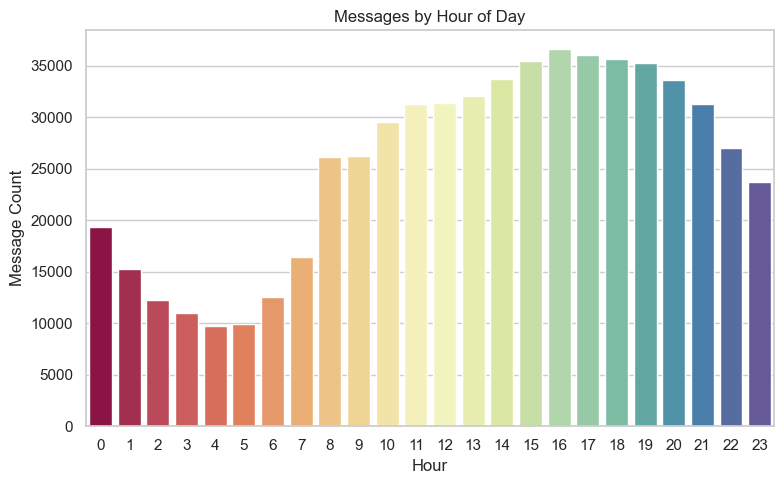

In [17]:
# Messages by hour
hour_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='Spectral', hue=hour_counts.index, legend=False)
plt.title('Messages by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Message Count')
plt.tight_layout()
plt.show()


### Heatmap: Day of Week vs. Hour

Visualize message frequency using a pivot table for day of week and hour.

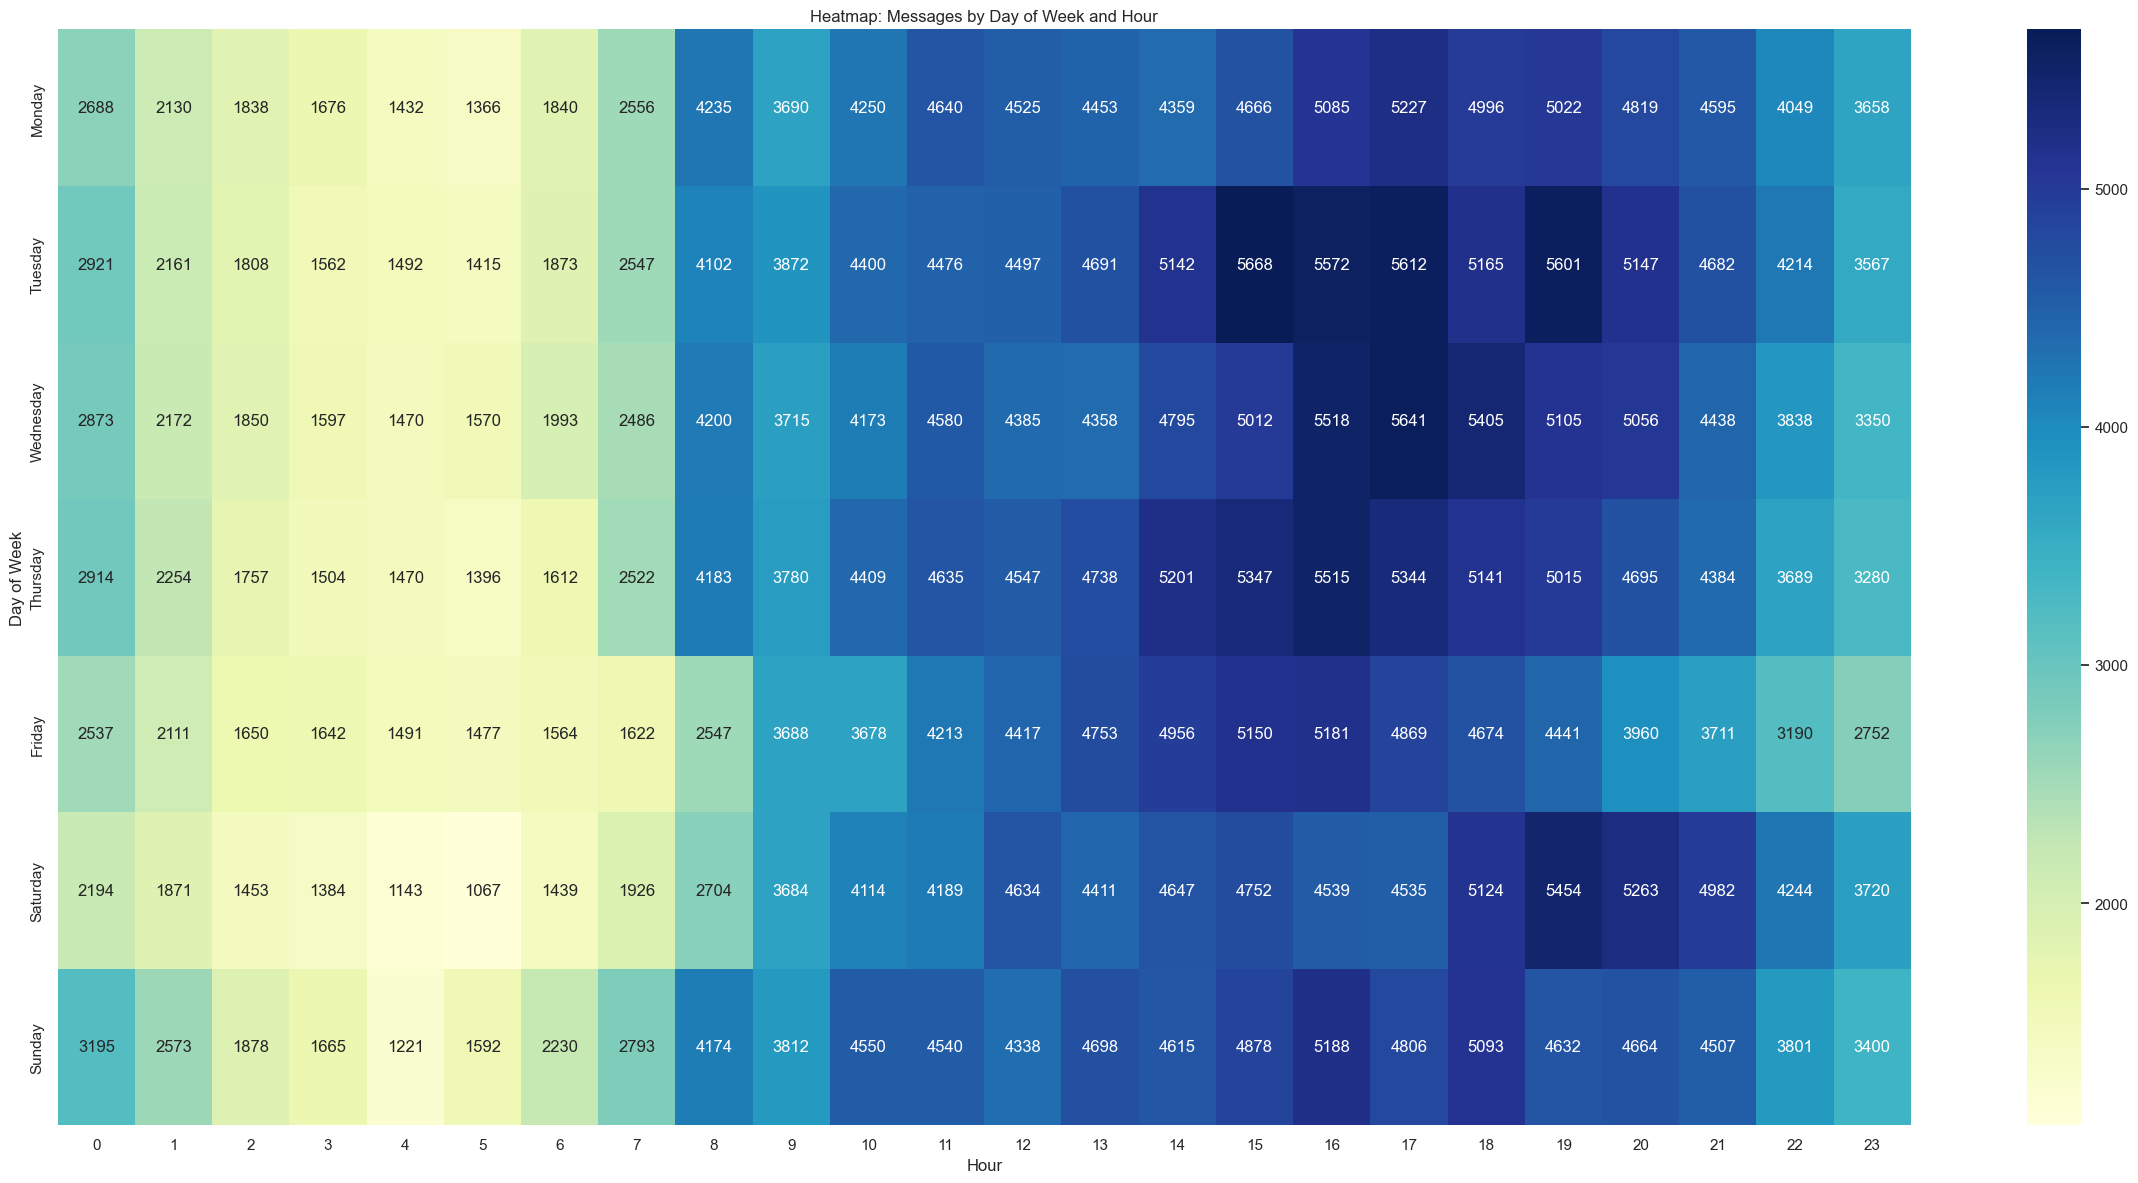

In [18]:
# Create a pivot table: rows=day_name, columns=hour, values=count of messages
pivot = df.pivot_table(index='day_name', columns='hour', values='message_id', aggfunc='count')

# Reorder rows according to the day_map order
pivot = pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(24, 12))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap: Messages by Day of Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


## Bivariate & Correlation Analysis

We explore relationships between numeric features. Here, we include columns like `emoji_count`, `word_count`, `views`, and `forward_count`.

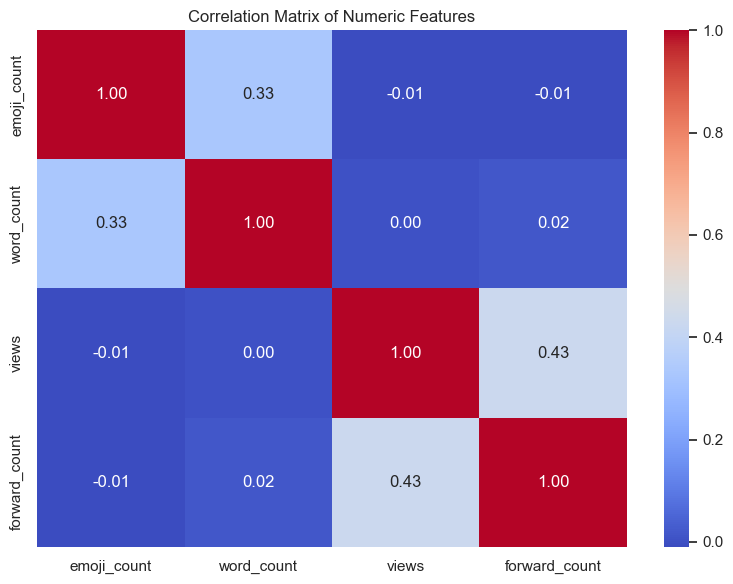

In [19]:
# Compute correlation matrix for selected numeric columns
corr_matrix = df[numeric_cols_analysis].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


### Scatter Plots

Visualize pairwise relationships, e.g., `word_count` vs. `views` and `emoji_count` vs. `forward_count`.

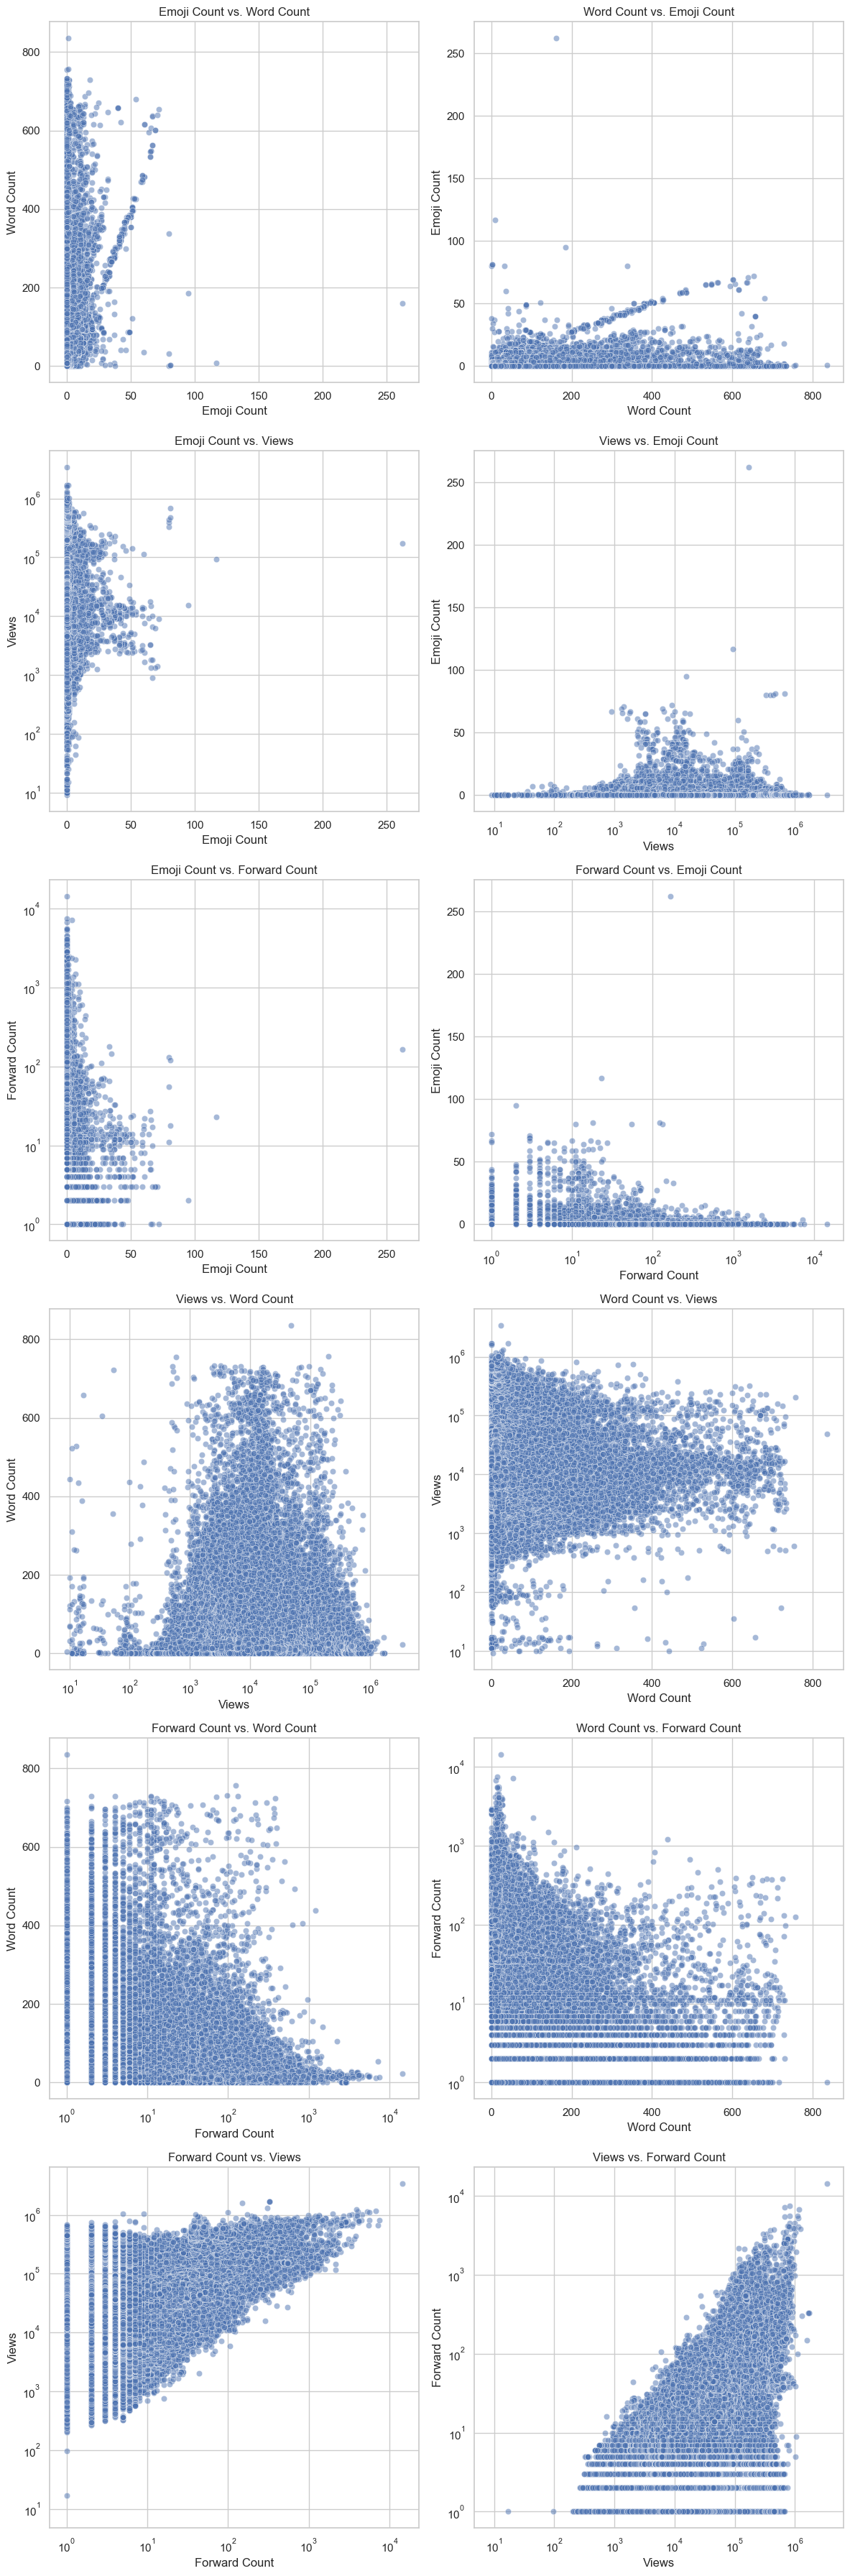

In [20]:
# Get unique pairs (without duplicates)
unique_pairs = []
seen_pairs = set()
for x in numeric_cols_analysis:
    for y in numeric_cols_analysis:
        if x != y:
            pair = tuple(sorted([x, y]))
            if pair not in seen_pairs:
                seen_pairs.add(pair)
                unique_pairs.append(pair)

# Calculate subplot layout
n_pairs = len(unique_pairs)
n_cols = 2  # Two columns for each pair
n_rows = n_pairs

plt.figure(figsize=(12, 6 * n_rows))

for idx, (col1, col2) in enumerate(unique_pairs):
    # Plot first version (col1 vs col2)
    plt.subplot(n_rows, n_cols, idx * 2 + 1)
    sns.scatterplot(x=col1, y=col2, data=df, alpha=0.5)
    plt.title(f'{col1.replace("_", " ").title()} vs. {col2.replace("_", " ").title()}')
    plt.xlabel(col1.replace("_", " ").title())
    plt.ylabel(col2.replace("_", " ").title())
    if df[col1].max() > 1000: plt.xscale('log')
    if df[col2].max() > 1000: plt.yscale('log')

    # Plot second version (col2 vs col1)
    plt.subplot(n_rows, n_cols, idx * 2 + 2)
    sns.scatterplot(x=col2, y=col1, data=df, alpha=0.5)
    plt.title(f'{col2.replace("_", " ").title()} vs. {col1.replace("_", " ").title()}')
    plt.xlabel(col2.replace("_", " ").title())
    plt.ylabel(col1.replace("_", " ").title())
    if df[col2].max() > 1000: plt.xscale('log')
    if df[col1].max() > 1000: plt.yscale('log')

plt.tight_layout()
plt.show()

## Categorical & Advanced Analysis

We now analyze categorical variables and additional features:
- **Media Type:** Distribution of messages by `media_type`.
- **Forwarded Messages:** Examine messages with non-null `forwarded_from` (and consider `forward_count`).
- **Reply Analysis:** Count messages that are replies (`reply_to_msg_id`).
- **Sender Activity:** Identify top senders.
- **Entities & Text:** Optionally, analyze text features (e.g., hashtag usage).

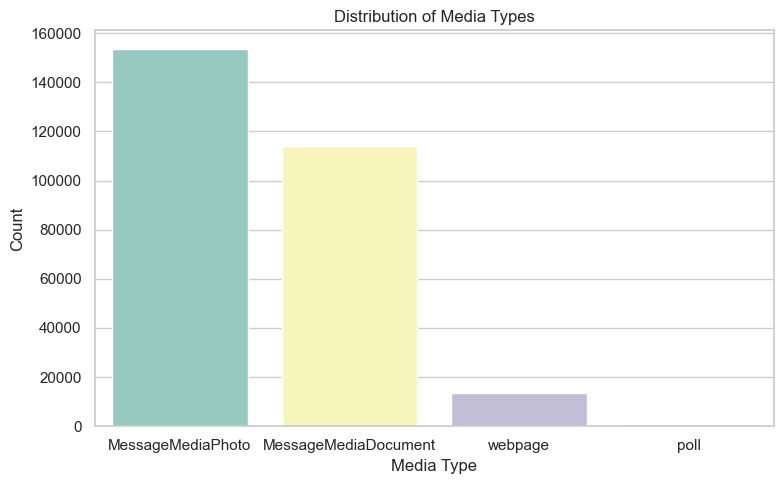

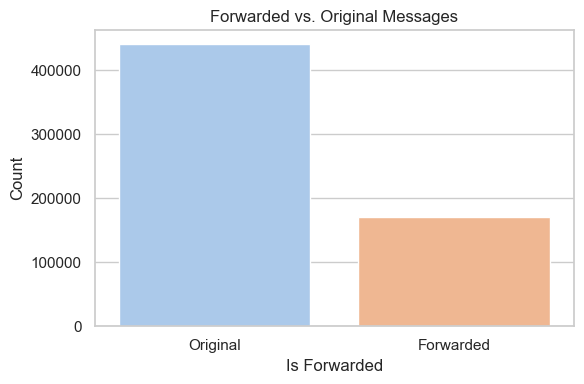

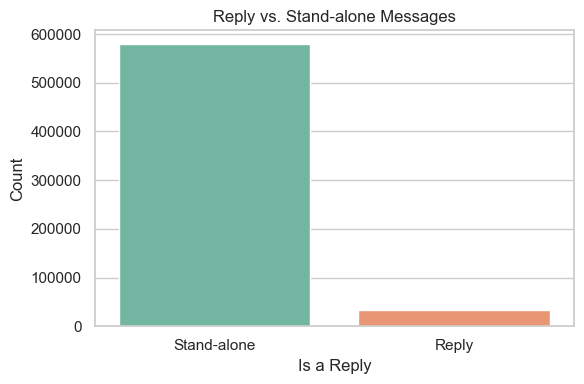

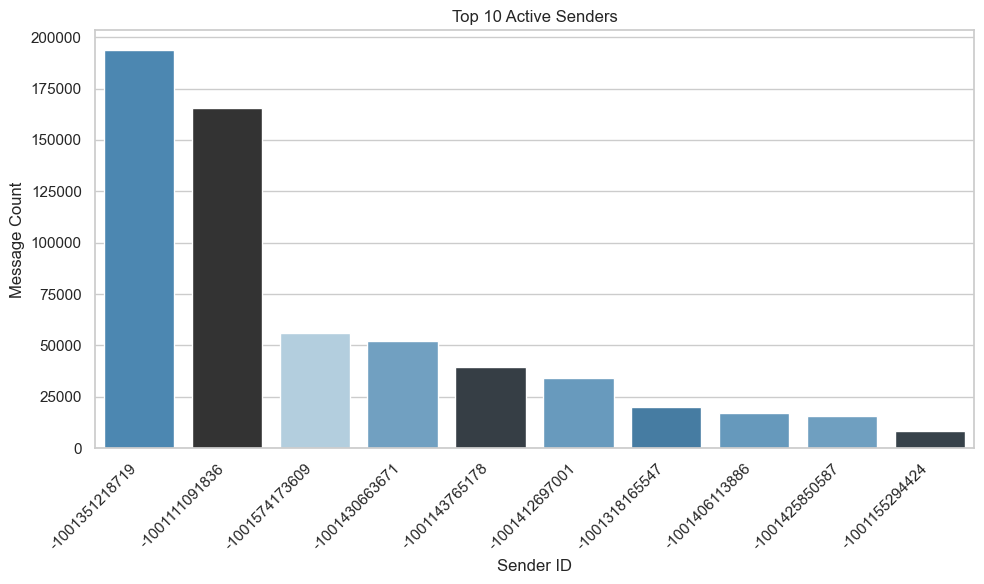

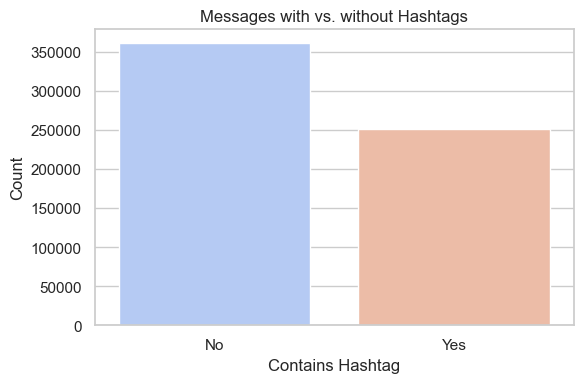

In [21]:
# %% [code]
# Media Type Distribution
media_counts = df['media_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=media_counts.index, y=media_counts.values, palette='Set3', hue=media_counts.index, legend=False)
plt.title('Distribution of Media Types')
plt.xlabel('Media Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Forwarded Messages Analysis: count messages with non-null 'forwarded_from'
forwarded_counts = df['forwarded_from'].notnull().value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=forwarded_counts.index.astype(str), y=forwarded_counts.values, palette='pastel', hue=forwarded_counts.index, legend=False)
plt.title('Forwarded vs. Original Messages')
plt.xlabel('Is Forwarded')
plt.ylabel('Count')
plt.xticks([0, 1], ['Original', 'Forwarded'])
plt.tight_layout()
plt.show()

# Reply Analysis: count messages with non-null 'reply_to_msg_id'
reply_counts = df['reply_to_msg_id'].notnull().value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=reply_counts.index.astype(str), y=reply_counts.values, palette='Set2', hue=reply_counts.index, legend=False)
plt.title('Reply vs. Stand-alone Messages')
plt.xlabel('Is a Reply')
plt.ylabel('Count')
plt.xticks([0, 1], ['Stand-alone', 'Reply'])
plt.tight_layout()
plt.show()

# Sender Activity: Top 10 most active senders
top_senders = df['sender_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_senders.index.astype(str), y=top_senders.values, palette='Blues_d', hue=top_senders.index, legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Active Senders')
plt.xlabel('Sender ID')
plt.ylabel('Message Count')
plt.tight_layout()
plt.show()

# Entities & Text Analysis
# Example: Identify messages containing hashtags by checking the 'text' column.
df['has_hashtag'] = df['text'].fillna('').apply(lambda x: '#' in x)
hashtag_counts = df['has_hashtag'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=hashtag_counts.index.astype(str), y=hashtag_counts.values, palette='coolwarm', hue=hashtag_counts.index, legend=False)
plt.title('Messages with vs. without Hashtags')
plt.xlabel('Contains Hashtag')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


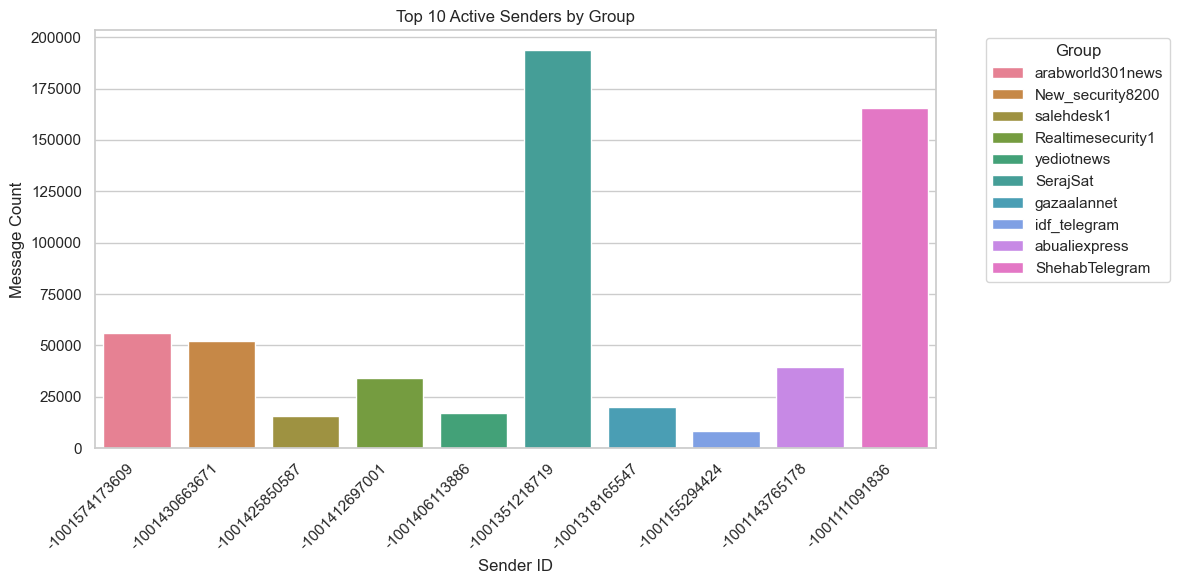

In [22]:
# Sender Activity: Top 10 most active senders with their groups
sender_groups = df.groupby(['sender_id', 'group_name']).size().reset_index(name='count')
top_senders = sender_groups.nlargest(10, 'count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_senders,
    x='sender_id',
    y='count',
    hue='group_name',
    palette='husl'  # Using husl palette for more distinct colors
)

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Active Senders by Group')
plt.xlabel('Sender ID')
plt.ylabel('Message Count')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Group Categorization Analysis

In this section we incorporate external metadata from a group mapping (stored in `consts.py`) to analyze message counts and engagement by group type and language.

In [23]:
# Import the group mapping from consts.py
from telegram_groups_messages.consts import TELEGRAM_GROUPS_MAP

# Convert the mapping dictionary to a DataFrame.
groups_df = pd.DataFrame.from_dict(TELEGRAM_GROUPS_MAP, orient='index')
groups_df.index.name = 'group_key'
groups_df.reset_index(inplace=True)

# Display the group mapping DataFrame
print("Group Mapping DataFrame:")
display(groups_df)


Group Mapping DataFrame:


,group_key,group_name,language,type
0,idf_telegram,IDF - The Official Channel,Hebrew,Israeli side
1,ForumPressReleases,Until the Last Hostage - The Official Page,Hebrew,Israeli side
2,abualiexpress,Abu Ali Express,Hebrew,Israeli commentary
3,arabworld301news,Arab World 301 News,Hebrew,Israeli commentary
4,salehdesk1,Abu Saleh The Arab Desk,Hebrew,Israeli commentary
5,yediotnews,News from the Field on Telegram,Hebrew,Israeli news
6,Realtimesecurity1,Real-Time News,Hebrew,Israeli news
7,New_security8200,News Channel 8200,Hebrew,Israeli news
8,hamasps,Hamas Movement,Arabic,Palestinian side
9,qassambrigades,Al-Qassam Brigades,Arabic,Palestinian side


In [24]:
groups_df.to_csv('../TELEGRAM_GROUPS_MAP_df.csv')

### Merge Group Metadata with Main DataFrame

We merge the group categorization information with our main DataFrame using the `group_name` column.

In [25]:
# %% [code]
# Merge the group metadata with the main DataFrame (left join to keep all messages)
df_merged = df.merge(groups_df, on='group_name', how='left')

# Display a sample of the merged DataFrame
print("Merged DataFrame sample:")
display(df_merged.head())


Merged DataFrame sample:


,group_name,message_id,utc_date,local_date,text,sender_id,reply_to_msg_id,forwarded_from,forward_count,media_type,...,day_of_week,month,week_of_year,word_count,emoji_count,day_name,has_hashtag,group_key,language,type
0,idf_telegram,15461,2025-02-21 19:35:05+0000,2025-02-21 19:35:05+00:00,"דובר צה""ל: \n\nבהמשך לדיווחים על אודות שירי בי...",-1001155294424,NaN,None,27.0,None,...,4,2,7,35,0,Friday,False,NaN,NaN,NaN
1,idf_telegram,15460,2025-02-21 13:50:56+0000,2025-02-21 13:50:56+00:00,צפו בעדכון דובר צה״ל בשידור חי >>>\nhttps://ww...,-1001155294424,NaN,None,23.0,MessageMediaPhoto,...,4,2,7,8,0,Friday,False,NaN,NaN,NaN
2,idf_telegram,15459,2025-02-21 10:30:15+0000,2025-02-21 10:30:15+00:00,המבצע ביהודה ושומרון נמשך:\nכוחות דובדבן עצרו ...,-1001155294424,NaN,None,12.0,MessageMediaPhoto,...,4,2,7,14,0,Friday,False,NaN,NaN,NaN
3,idf_telegram,15458,2025-02-21 00:20:08+0000,2025-02-21 00:20:08+00:00,"דובר צה""ל:\n\nבהתאם להערכת המצב הוחלט על תגבור...",-1001155294424,NaN,None,21.0,None,...,4,2,7,42,0,Friday,False,NaN,NaN,NaN
4,idf_telegram,15457,2025-02-20 23:07:30+0000,2025-02-20 23:07:30+00:00,דובר צה״ל:\n\nלאחר השלמת הליך הזיהוי על ידי המ...,-1001155294424,NaN,None,112.0,None,...,4,2,7,174,0,Friday,False,NaN,NaN,NaN


In [26]:
# First, check if 'group_name' exists in both DataFrames
print("Columns in df:", df.columns.tolist())
print("Columns in groups_df:", groups_df.columns.tolist())

# Correct the merge - use left_on and right_on parameters to specify different column names
df_merged = df.merge(
    groups_df,
    left_on='group_name',  # Column name in the left DataFrame (df)
    right_on='group_key',  # Column name in the right DataFrame (groups_df)
    how='left'
)

# Display a sample of the merged DataFrame
print("Merged DataFrame sample:")
display(df_merged.head())

Columns in df: ['group_name', 'message_id', 'utc_date', 'local_date', 'text', 'sender_id', 'reply_to_msg_id', 'forwarded_from', 'forward_count', 'media_type', 'media_attributes', 'entities', 'views', 'reactions', 'hour', 'day_of_week', 'month', 'week_of_year', 'word_count', 'emoji_count', 'day_name', 'has_hashtag']
Columns in groups_df: ['group_key', 'group_name', 'language', 'type']
Merged DataFrame sample:


,group_name_x,message_id,utc_date,local_date,text,sender_id,reply_to_msg_id,forwarded_from,forward_count,media_type,...,month,week_of_year,word_count,emoji_count,day_name,has_hashtag,group_key,group_name_y,language,type
0,idf_telegram,15461,2025-02-21 19:35:05+0000,2025-02-21 19:35:05+00:00,"דובר צה""ל: \n\nבהמשך לדיווחים על אודות שירי בי...",-1001155294424,NaN,None,27.0,None,...,2,7,35,0,Friday,False,idf_telegram,IDF - The Official Channel,Hebrew,Israeli side
1,idf_telegram,15460,2025-02-21 13:50:56+0000,2025-02-21 13:50:56+00:00,צפו בעדכון דובר צה״ל בשידור חי >>>\nhttps://ww...,-1001155294424,NaN,None,23.0,MessageMediaPhoto,...,2,7,8,0,Friday,False,idf_telegram,IDF - The Official Channel,Hebrew,Israeli side
2,idf_telegram,15459,2025-02-21 10:30:15+0000,2025-02-21 10:30:15+00:00,המבצע ביהודה ושומרון נמשך:\nכוחות דובדבן עצרו ...,-1001155294424,NaN,None,12.0,MessageMediaPhoto,...,2,7,14,0,Friday,False,idf_telegram,IDF - The Official Channel,Hebrew,Israeli side
3,idf_telegram,15458,2025-02-21 00:20:08+0000,2025-02-21 00:20:08+00:00,"דובר צה""ל:\n\nבהתאם להערכת המצב הוחלט על תגבור...",-1001155294424,NaN,None,21.0,None,...,2,7,42,0,Friday,False,idf_telegram,IDF - The Official Channel,Hebrew,Israeli side
4,idf_telegram,15457,2025-02-20 23:07:30+0000,2025-02-20 23:07:30+00:00,דובר צה״ל:\n\nלאחר השלמת הליך הזיהוי על ידי המ...,-1001155294424,NaN,None,112.0,None,...,2,7,174,0,Friday,False,idf_telegram,IDF - The Official Channel,Hebrew,Israeli side


In [27]:
# After the merge, clean up the column names

# Drop the redundant group_key column
df_merged = df_merged.drop('group_key', axis=1)

# Rename group_name_y to group_title (the human-readable name shown in the Telegram app)
df_merged = df_merged.rename(columns={
    'group_name_x': 'group_name',  # This is the original group_name from df (identifier)
    'group_name_y': 'group_title'  # This is from groups_df (display name in Telegram)
})

# Display a sample of the cleaned DataFrame
print("Cleaned merged DataFrame sample:")
display(df_merged.head())

Cleaned merged DataFrame sample:


,group_name,message_id,utc_date,local_date,text,sender_id,reply_to_msg_id,forwarded_from,forward_count,media_type,...,day_of_week,month,week_of_year,word_count,emoji_count,day_name,has_hashtag,group_title,language,type
0,idf_telegram,15461,2025-02-21 19:35:05+0000,2025-02-21 19:35:05+00:00,"דובר צה""ל: \n\nבהמשך לדיווחים על אודות שירי בי...",-1001155294424,NaN,None,27.0,None,...,4,2,7,35,0,Friday,False,IDF - The Official Channel,Hebrew,Israeli side
1,idf_telegram,15460,2025-02-21 13:50:56+0000,2025-02-21 13:50:56+00:00,צפו בעדכון דובר צה״ל בשידור חי >>>\nhttps://ww...,-1001155294424,NaN,None,23.0,MessageMediaPhoto,...,4,2,7,8,0,Friday,False,IDF - The Official Channel,Hebrew,Israeli side
2,idf_telegram,15459,2025-02-21 10:30:15+0000,2025-02-21 10:30:15+00:00,המבצע ביהודה ושומרון נמשך:\nכוחות דובדבן עצרו ...,-1001155294424,NaN,None,12.0,MessageMediaPhoto,...,4,2,7,14,0,Friday,False,IDF - The Official Channel,Hebrew,Israeli side
3,idf_telegram,15458,2025-02-21 00:20:08+0000,2025-02-21 00:20:08+00:00,"דובר צה""ל:\n\nבהתאם להערכת המצב הוחלט על תגבור...",-1001155294424,NaN,None,21.0,None,...,4,2,7,42,0,Friday,False,IDF - The Official Channel,Hebrew,Israeli side
4,idf_telegram,15457,2025-02-20 23:07:30+0000,2025-02-20 23:07:30+00:00,דובר צה״ל:\n\nלאחר השלמת הליך הזיהוי על ידי המ...,-1001155294424,NaN,None,112.0,None,...,4,2,7,174,0,Friday,False,IDF - The Official Channel,Hebrew,Israeli side


### Message Counts by Group Type

Visualize the number of messages per group type.

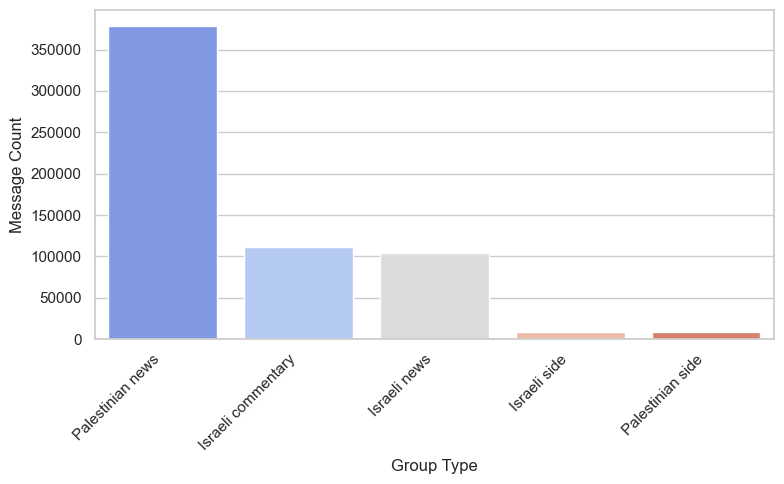

In [35]:
# Count messages by group 'type'
type_counts = df_merged['type'].value_counts(dropna=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts.index.astype(str), y=type_counts.values, palette='coolwarm', hue=type_counts.index, legend=False)
plt.title('Number of Messages by Group Type')
plt.xlabel('Group Type')
plt.ylabel('Message Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Message Counts by Language

Analyze the distribution of messages by language.

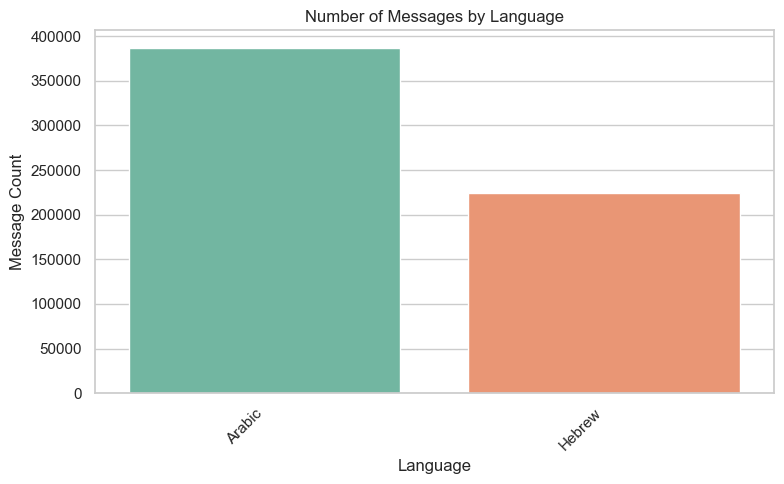

In [29]:
# Count messages by 'language'
language_counts = df_merged['language'].value_counts(dropna=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=language_counts.index.astype(str), y=language_counts.values, palette='Set2', hue=language_counts.index, legend=False)
plt.title('Number of Messages by Language')
plt.xlabel('Language')
plt.ylabel('Message Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Engagement Metrics by Group Type

Compare engagement metrics such as average views and average word count across group types.

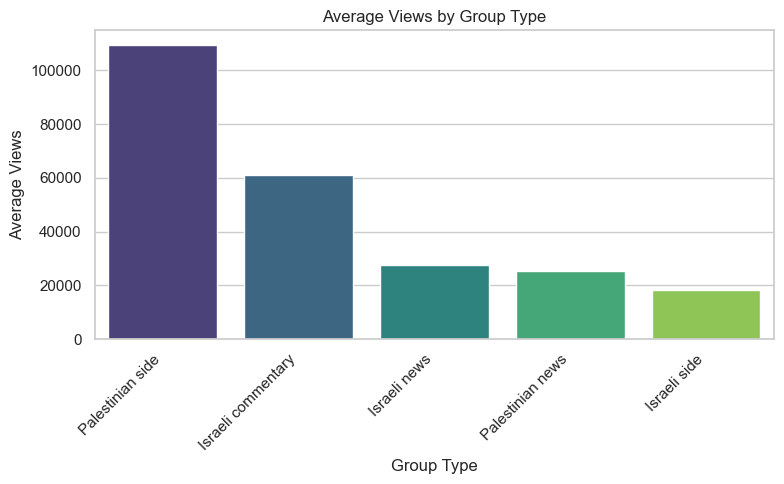

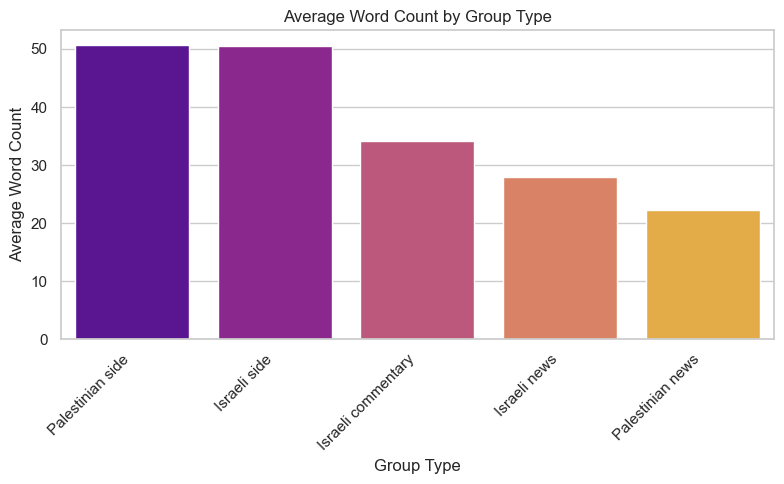

In [30]:
# Average views by group type
avg_views_by_type = df_merged.groupby('type')['views'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_views_by_type.index.astype(str), y=avg_views_by_type.values, palette='viridis', hue=avg_views_by_type.index, legend=False)
plt.title('Average Views by Group Type')
plt.xlabel('Group Type')
plt.ylabel('Average Views')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average word count by group type
avg_word_count_by_type = df_merged.groupby('type')['word_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_word_count_by_type.index.astype(str), y=avg_word_count_by_type.values, palette='plasma', hue=avg_word_count_by_type.index, legend=False)
plt.title('Average Word Count by Group Type')
plt.xlabel('Group Type')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Conclusion

This updated notebook performs a comprehensive EDA on the Telegram messages dataset using the new schema. We explored:
- **Data Quality:** Shape, missing values, duplicates, and basic descriptive statistics.
- **Univariate Analysis:** Message counts per group, null text counts, and temporal distributions (using `local_date`).
- **Numeric Distributions:** Histograms and boxplots for features like emoji count, word count, views, and forward count.
- **Temporal Trends:** Analysis by hour, day (with conversion from integer to day name), and a heatmap of day-hour interactions.
- **Bivariate Analysis:** Correlations and scatter plots between numeric features.
- **Categorical Analysis:** Distributions of media types, forwarded messages, replies, sender activity, and text/hashtag analysis.
- **Group Categorization:** Merging external metadata from `consts.py` to examine message counts and engagement metrics by group type and language.

In [31]:
print(df.columns)

print(df_merged.columns)

Index(['group_name', 'message_id', 'utc_date', 'local_date', 'text',
       'sender_id', 'reply_to_msg_id', 'forwarded_from', 'forward_count',
       'media_type', 'media_attributes', 'entities', 'views', 'reactions',
       'hour', 'day_of_week', 'month', 'week_of_year', 'word_count',
       'emoji_count', 'day_name', 'has_hashtag'],
      dtype='object')
Index(['group_name', 'message_id', 'utc_date', 'local_date', 'text',
       'sender_id', 'reply_to_msg_id', 'forwarded_from', 'forward_count',
       'media_type', 'media_attributes', 'entities', 'views', 'reactions',
       'hour', 'day_of_week', 'month', 'week_of_year', 'word_count',
       'emoji_count', 'day_name', 'has_hashtag', 'group_title', 'language',
       'type'],
      dtype='object')


In [32]:
# Save final df as csv for further analysis
df.to_csv("../data/groups_messages_eda.csv", index=False)
df_merged.to_csv("../data/groups_messages_and_map.csv", index=False)